In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from colors import colors
from matplotlib.path import Path
import matplotlib.patches as patches

df=pd.read_csv("COL",sep='\s+',comment="#")

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=800,constrained_layout=True)
# fig=plt.figure(figsize=(6,4))
eRMSD,d,G=df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]
mpl.rc('figure')

mpl.rcParams['text.usetex'] = True
mpl.rcParams[
    'text.latex.preamble'] = r'\usepackage[cm]{sfmath}\usepackage{amsmath}\usepackage{amssymb}'

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif'

font_size = 20

fonts = {
    "axes.labelsize": font_size,
    "font.size": font_size,
    "legend.fontsize": font_size,
    "xtick.labelsize": font_size,
    "ytick.labelsize": font_size,
    "axes.titlesize": font_size,
}

mpl.rcParams.update(fonts)

axes_settings = {
    "axes.labelcolor": '#2e2e2e',
    "axes.spines.top": True,
    "axes.spines.right": True,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.color": '#2e2e2e',
    "ytick.color": '#2e2e2e',
    "text.color": '#2e2e2e',
    "axes.edgecolor": '#2e2e2e',
}
mpl.rcParams.update(axes_settings)

In [302]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from colors import colors
from matplotlib.path import Path
import matplotlib.patches as patches
import math

In [303]:
df=pd.read_csv("COLVAR_REWEIGHT_cn_2.7ang_RMSD_upto-6195ns",sep='\s+',comment="#")

In [304]:
t,eRMSD,r,d1,c,c1,v=df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],df.iloc[:,4],df.iloc[:,5],df.iloc[:,6]

In [305]:
print(v)
print(max(v),min(v))

0          84.669955
1          85.201010
2          82.025748
3          82.366514
4          76.375248
             ...    
6174273    18.992466
6174274    46.070491
6174275    17.376226
6174276    48.706392
6174277    51.892972
Name: 79.206017, Length: 6174278, dtype: float64
116.28152 0.530936


In [317]:
v -= np.max(v)
print(v)
# v2 = np.exp(v1)

0         -31.611565
1         -31.080510
2         -34.255772
3         -33.915006
4         -39.906272
             ...    
6174273   -97.289054
6174274   -70.211029
6174275   -98.905294
6174276   -67.575128
6174277   -64.388548
Name: 79.206017, Length: 6174278, dtype: float64


In [318]:
w = np.exp(v/(2.5))
# w = w / max(w)
w1 = np.sum(w)
w2 = w/w1
sum(w2)

0.9999999999970753

In [320]:
print(min(w2),max(w2))

2.0368998459205526e-24 0.00026115938585232406


In [321]:
# print(w1)
print(w2)

0          8.421983e-10
1          1.041521e-09
2          2.924614e-10
3          3.351704e-10
4          3.051238e-11
               ...     
6174273    3.281451e-21
6174274    1.659589e-16
6174275    1.719081e-21
6174276    4.763252e-16
6174277    1.703998e-15
Name: 79.206017, Length: 6174278, dtype: float64


In [279]:
# d1 = d1_unbiased/np.max(d1_unbiased)

In [322]:
# d1_unbiased = (np.sum(d1*w))/w1

# r_unbiased = r*w2
# c1_unbiased = c1*w2
d1_unbiased = d1*w
# eRMSD_unbiased = eRMSD/w1
# r_unbiased = r/w1
# c_unbiased = c/w1

(array([2.3000e+01, 3.7000e+02, 2.8590e+03, 1.1035e+04, 2.3932e+04,
        3.6442e+04, 4.2670e+04, 4.3269e+04, 3.9679e+04, 3.5508e+04,
        3.1735e+04, 2.9202e+04, 2.8345e+04, 2.9137e+04, 3.0270e+04,
        3.2518e+04, 3.4303e+04, 3.6220e+04, 3.6037e+04, 3.5603e+04,
        3.3952e+04, 3.1864e+04, 2.9324e+04, 2.7141e+04, 2.4597e+04,
        2.2829e+04, 2.1283e+04, 1.9878e+04, 1.8836e+04, 1.7791e+04,
        1.6422e+04, 1.6004e+04, 1.5055e+04, 1.4030e+04, 1.3008e+04,
        1.2189e+04, 1.1317e+04, 1.0656e+04, 9.8770e+03, 9.1800e+03,
        8.4480e+03, 7.9980e+03, 7.4220e+03, 6.8750e+03, 6.5520e+03,
        6.1230e+03, 5.7410e+03, 5.4020e+03, 5.0590e+03, 4.8150e+03,
        4.3660e+03, 4.1130e+03, 3.8990e+03, 3.6040e+03, 3.5880e+03,
        3.3480e+03, 3.2570e+03, 3.2080e+03, 3.2050e+03, 3.2940e+03,
        3.3930e+03, 3.5680e+03, 3.7090e+03, 3.8660e+03, 4.0140e+03,
        4.4650e+03, 4.5930e+03, 4.9410e+03, 5.1430e+03, 5.3270e+03,
        5.6550e+03, 5.9300e+03, 6.3620e+03, 6.73

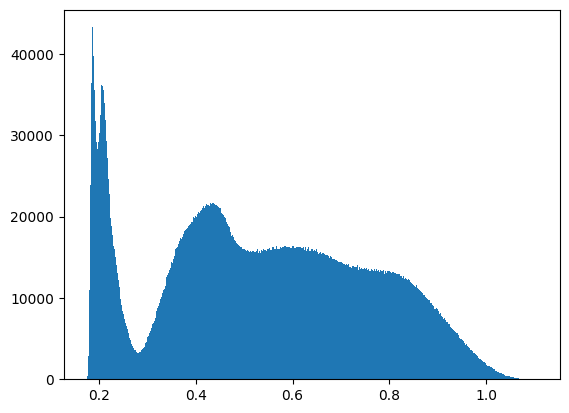

In [323]:
# w2=w/w1
plt.hist(d1,bins=500)

In [324]:
# print(r_unbiased)
# print(c1_unbiased)
print(d1_unbiased)

0          6.252618e-07
1          7.669730e-07
2          2.256066e-07
3          2.547820e-07
4          2.341010e-08
               ...     
6174273    2.752085e-18
6174274    1.333426e-13
6174275    1.442587e-18
6174276    3.747504e-13
6174277    1.404517e-12
Length: 6174278, dtype: float64


0.195074 1.9532406149502222e-21


(array([6.073144e+06, 2.388000e+04, 1.249200e+04, 8.385000e+03,
        6.273000e+03, 4.593000e+03, 3.554000e+03, 2.959000e+03,
        2.498000e+03, 2.183000e+03, 1.944000e+03, 1.750000e+03,
        1.536000e+03, 1.432000e+03, 1.226000e+03, 1.190000e+03,
        1.050000e+03, 9.750000e+02, 8.800000e+02, 7.920000e+02,
        7.910000e+02, 7.130000e+02, 7.130000e+02, 6.280000e+02,
        6.070000e+02, 5.850000e+02, 5.650000e+02, 5.000000e+02,
        4.960000e+02, 4.360000e+02, 4.480000e+02, 4.190000e+02,
        4.080000e+02, 3.830000e+02, 3.750000e+02, 3.490000e+02,
        3.590000e+02, 3.550000e+02, 3.270000e+02, 2.860000e+02,
        3.000000e+02, 2.940000e+02, 2.620000e+02, 2.390000e+02,
        2.310000e+02, 2.310000e+02, 2.380000e+02, 2.480000e+02,
        2.200000e+02, 1.800000e+02, 1.980000e+02, 1.920000e+02,
        1.940000e+02, 1.980000e+02, 1.410000e+02, 1.630000e+02,
        1.480000e+02, 1.580000e+02, 1.650000e+02, 1.080000e+02,
        1.400000e+02, 1.220000e+02, 1.40

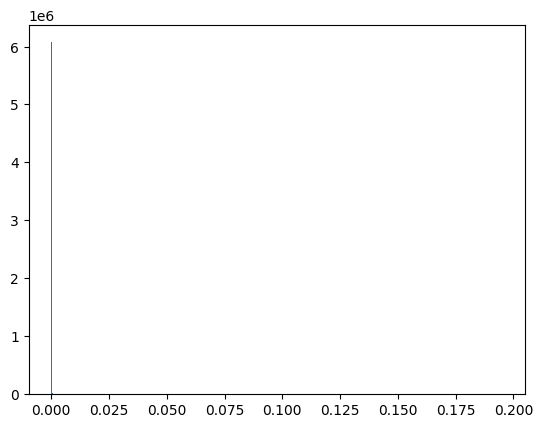

In [325]:
print(max(d1_unbiased),min(d1_unbiased))
# n_bins = np.linspace(0.5,max(d1_unbiased),500)
plt.hist(d1_unbiased,bins=500)

In [299]:
w, bins = np.histogram(w,bins=100)
print(len(w))

100


100
100
100 100


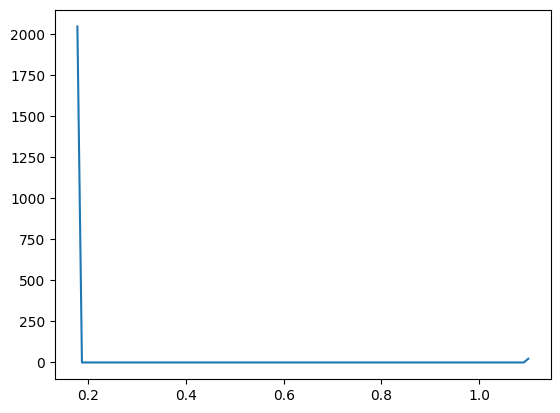

In [300]:
# xlen = np.linspace(0,np.max(d1),100)
ylen = np.linspace(0,np.max(eRMSD_unbiased),100)
# df=pd.read_csv("distance/fes_99.dat",sep='\s+',comment="#")
print(len(xlen))
print(len(ylen))
# t,d1=df.iloc[:,0],df.iloc[:,1]
# plt.plot(t,d1)
# H,xedges, yedges = np.histogram2d(d1_unbiased,eRMSD_unbiased, bins=[xlen,ylen], density=False)
# H,xedges= np.histogram(d1,bins=xlen,density=False)
H,xedges= np.histogram(d1,bins=100,density=False)
# H = H.T
# print(H.shape)
print(len(H),len(w))
xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2
H = -np.log(H)
H = H - np.min(H)
plt.plot(xcenters,((8.314*0.3*H)*w))
# X, Y = np.meshgrid(xcenters,ycenters)
# cf = plt.contour(X,Y,H, cmap='nipy_spectral')
# cf = plt.contourf(X,Y,H, cmap="nipy_spectral")
# plt.xlim(0.18,0.55)
# plt.ylim(0,4)

In [ ]:
prob,binv1=np.histogram(d1_unbiased,bins=100)

print(binv1)
bin_updated = [0.5*(binv1[i]+binv1[i+1]) for i in range(len(binv1)-1)]

In [ ]:
prob3 = -8.314*300*np.log(prob2/np.sum(prob2))
plt.plot(bin_updated,prob3)
# plt.ylim([25,60])
# plt.xlim([0.18,0.6])

In [101]:
100/(0.3*8.314)

40.09301579664823